In [3]:
import astropy
import numpy as np
import pandas as pd
import matplotlib
import scipy

from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter 
from scipy import stats

In [4]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.color'] = 'Black'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = (9, 6)

In [5]:
file = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/LMC_30Dor_fg/the actual cube!.fits')
file[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 3191                                                  
NAXIS2  =                 2681                                                  
NAXIS3  =                  301                                                  
BLANK   =                   -1  /                                               
BUNIT   = 'K       '                                                            
DATE-OBS= '2021-10-27T16:16:57.5'  /                                            
TELESCOP= 'ASKAP   '  /                                                         
CRPIX1  =    1.70200000000E+03  /                                               
CDELT1  =   -1.94444444444E-03  /                                               
CRVAL1  =    8.32511958333E+

In [6]:
FUSE = pd.read_csv('/Users/FRANNYPACK/Downloads/grind!/research/Data/MW_H2_components.csv')
FUSE = FUSE[(FUSE["DEC"] < -67.5) & (FUSE["RA"] > 75)] # relevant stars in LMC

In [7]:
FUSE

star       vcen         RA        DEC  total_log10_N
49       BI130  14.769906  79.525250 -69.242917      18.468860
50       BI173  14.802943  81.792000 -69.132278      18.918631
51       BI184   6.971178  82.627500 -71.042022      19.257570
53       BI237   9.588402  84.061167 -67.655361      18.685019
54       BI253  -0.793440  84.393708 -69.019389      17.263305
..         ...        ...        ...        ...            ...
180  Sk-69_220  -2.734920  84.182625 -69.496500      16.256745
181   Sk-69_94  11.362431  79.560542 -69.250278      14.555161
182   Sk-69_94  41.290652  79.560542 -69.250278      17.699636
183   Sk-71.50  10.248197  85.180500 -71.483139      19.530947
184   Sk-71_38   1.383824  82.661542 -71.029972      18.988490

[64 rows x 5 columns]

In [8]:
FUSE_no_v = pd.read_csv('/Users/FRANNYPACK/Downloads/grind!/research/Data/FUSE_info (SMC + LMC).csv')
FUSE_no_v = FUSE_no_v[(FUSE_no_v["DEC_FK5"] < -67.5) & (FUSE_no_v["RA_FK5"] > 75)]

In [9]:
FUSE_no_v

Target     RA_FK5    DEC_FK5 Galaxy     SpecType      FUSE_ID  \
0          Sk-69_94  79.560542 -69.250278    LMC      A0e/LBV  Z9050201000   
1         HDE269599  82.094500 -69.142281    LMC            B  E9570301000   
2           HD38489  85.055833 -69.379500    LMC           B0  E9570501000   
4             BI184  82.627500 -71.042022    LMC        B0.5V  P2170301000   
6          SK-69D59  75.803292 -69.027000    LMC         B0Ia  P1031103000   
7          SK-68D52  76.835833 -68.536000    LMC         B0Ia  P1174001000   
8      MACHO79-4779  77.371250 -68.917500    LMC          B0V  C1030301000   
9      MACHO78-6097  79.519583 -69.805278    LMC          B0V  C1030101000   
10           HV2274  75.670667 -68.405917    LMC      B1.5III  B0770201000   
11        Sk-69-237  84.505625 -69.370472    LMC         B1Ia  B1280701000   
12            HV982  82.468750 -69.156111    LMC          B1V  C1030201000   
15          HD38029  84.233333 -69.193333    LMC            O  P2150201000   
17            BI253  84.393708 -69.019389    LMC        O3If*  C0020601000   
18   J053441-693139  83.672083 -69.527500    LMC     O3If+O6V  F3210301000   
19             Mk42  84.675417 -69.098528    LMC     O3If+WN6  D0981701000   
21         HD269810  83.808000 -67.557500    LMC     O3III(f)  P1171601000   
22        SK-68D137  84.603208 -68.875778    LMC      O3IIIf*  E5114201000   
23         LH54-425  81.601042 -67.504778    LMC    O3IIIf+O5  F3210203000   
24            BI237  84.061167 -67.655361    LMC          O3V  E5114001000   
25        SK-67D108  81.611042 -67.622306    LMC      O4-5III  E5113302000   
26         SK-71D45  82.814792 -71.069139    LMC     O4-5IIIf  P1031501000   
29        SK-67D166  82.934625 -67.633500    LMC        O4If+  A1330101000   
30        SK-67D167  82.966583 -67.661417    LMC       O4Inf+  P1171901000   
31         SK-70D60  76.170583 -70.259583    LMC          O4V  P1172001000   
32         SK-70D69  76.328042 -70.430500    LMC          O4V  P1172101000   
38         Sk-71.50  85.180500 -71.483139    LMC       O6.5II  A0491201000   
39        SK-70D115  87.207333 -70.065972    LMC      O6.5III  P1172601000   
41         SK-70D91  81.890583 -70.613417    LMC        O6.5V  P1172501000   
45        SK-69D104  79.748208 -69.215194    LMC      O6Ib(f)  P1172401000   
47         SK-71D19  80.566167 -71.361086    LMC        O6III  E5113001000   
56       N44C-Star2  80.559167 -67.976833    LMC          O7V  P2320101000   
59         D301-NW8  85.816500 -67.830833    LMC          O7V  D0981501000   
62            BI130  79.525250 -69.242917    LMC       O8.5Vf  E5112902000   
64        SK-67D168  82.967083 -67.572444    LMC          O8I  B0860901000   
65        SK-68D155  85.728750 -68.948444    LMC          O8I  B0860701000   
66         SK-67D38  75.874000 -67.873750    LMC        O8III  E5112601000   
67            BI173  81.792000 -69.132278    LMC        O8III  P1173201000   
69        SK-67D191  83.392167 -67.505444    LMC          O8V  P1173101000   
71         SK-70D32  75.043208 -70.186028    LMC       O9.5II  E5112501000   
75        SK-69D279  85.436250 -69.587417    LMC          O9I  B0860801000   
77        SK-69D124  81.326542 -69.053083    LMC         O9Ib  P1173601000   
78        SK-69D257  84.995446 -69.734228    LMC         O9II  P2170101000   
79        SK-67D101  81.484833 -67.507972    LMC        O9III  P1173401000   
80         SK-70D97  82.547292 -70.861722    LMC        O9III  E5113602000   
83        Sk-69_220  84.182625 -69.496500    LMC        Of/WN  Z9050701000   
84         HD269445  80.749458 -68.029611    LMC      OfpeWN9  B0270101000   
85        SK-68D135  84.452500 -68.918889    LMC     ON9.7Ia+  P1173901000   
88          HD37680  83.580792 -69.752778    LMC          WC4  P1175101000   
89          HD36521  81.626333 -68.840389    LMC  WC4+O6V-III  C1510101000   
90         Sk-71_38  82.661542 -71.029972    LMC       WC5+OB  Z9050601000   
92        Sk-67_184  83.297083 -67.

In [10]:
other_elem = pd.read_csv('/Users/FRANNYPACK/Downloads/grind!/research/Data/MW_H2_other_elem.csv')
other_elem = other_elem[(other_elem["DEC"] < -67.5) & (other_elem["galaxy_field"] == 'LMC') & (other_elem["RA"] > 75)]

# RELEVANT FUNCTIONS

In [11]:
# gets index of a specific velocity

def v_indx(v_val): # v_val must be in m/s
    v_indx = int((v_val - (3.04208717990 * 10 ** 4)) / (-2.44297870185 * 10 ** 2))
    return v_indx

In [12]:
# make 2D header 

def make_flat_hdr(file):
    hdr = file[0].header
    
    # Make a 2D header 
    flathdr = fits.Header()
    flathdr["NAXIS   "] = 2
    flathdr["NAXIS1  "] = hdr["NAXIS1  "]
    flathdr["NAXIS2  "] = hdr["NAXIS2  "]
    flathdr["CRPIX1  "] = hdr["CRPIX1  "]
    flathdr["CRPIX2  "] = hdr["CRPIX2  "]
    flathdr["CRVAL1  "] = hdr["CRVAL1  "]
    flathdr["CRVAL2  "] = hdr["CRVAL2  "]
    flathdr["CDELT1  "] = hdr["CDELT1  "]
    flathdr["CDELT2  "] = hdr["CDELT2  "]
    flathdr["CTYPE1  "] = hdr["CTYPE1  "]
    flathdr["CTYPE2  "] = hdr["CTYPE2  "]
    flathdr["LONPOLE "] = hdr["LONPOLE "]
    flathdr["LATPOLE "] = hdr["LATPOLE "]
    
    return flathdr

In [13]:
# gives pix vals associated w RA/DEC vals

def pix_vals(flat_FITS_hdr, ra_values, dec_values):
    wcs = WCS(flat_FITS_hdr)
    pix_arr = []
    x_pix = []
    y_pix = []
    for i in range(0, len(ra_values)):
        arr = []
        x_pix, y_pix = wcs.all_world2pix(ra_values[i], dec_values[i], 0)
        arr.append(x_pix)
        arr.append(y_pix)
        pix_arr.append(arr)
    
    return pix_arr

In [14]:
# does the actual work of the USM

def process_usm(cc_sum, FWHM = 30.):
    
    pix_len = file[0].header['CDELT2'] * 60 # ['CDELT2'] = pixel length in deg, multiply by 60 to convert to arcmin
    FWHM30_pix = FWHM / pix_len # want FWHM to be 30 arcmin, so convert to pixels
    sigma = FWHM30_pix / (2 * np.sqrt(2 * np.log(2))) # converts from FWHM to sigma, since Gaussian filter specified by sigma
    sum_smooth = gaussian_filter(cc_sum, sigma = sigma) # does smoothing using Gaussian filter
    
    sum_USM = cc_sum - sum_smooth
    
    return sum_USM


In [30]:
# for multiple channel maps
# computes unsharp mask over 3 km/s at a time, then adds them up (so as to not wash out the small-scale structure)

def usm_cd(v_indx_min, v_indx_max, FWHM = 30., maskb = False):
    cur = v_indx_min
    num_iterations = int((v_indx_max - v_indx_min) / 12) # 3 km/s = 12 maps at a time
    tot_cd = np.zeros((2681, 3191))
    
    for i in range(num_iterations + 1):
        if (i == num_iterations): # remainder of 12 that we have to integrate over
            if ((v_indx_max - v_indx_min) % 12 == 0): # nothing left to integrate over - we done!
                tot_cd[np.where(tot_cd < 0.)] = 0. # cancelling noise
                return tot_cd
            else:
                cd_arr = 1.82 * (10 ** 18) * np.nansum(file[0].data[cur:v_indx_max], axis = 0) * 0.244297870185
        else: 
            cd_arr = 1.82 * (10 ** 18) * np.nansum(file[0].data[cur:cur + 12], axis = 0) * 0.244297870185
        
        if maskb:
            cd_arr = mask_border(cd_arr)
            
        tot_cd += process_usm(cd_arr, FWHM = FWHM)
        cur += 12

    tot_cd[np.where(tot_cd < 0.)] = 0. # at end so negative noise cancels out with positive noise
    return tot_cd

In [16]:
def show_usm(cd, vmin = 0, vmax = 0):
    plt.figure(figsize = (15, 9))
    plt.imshow(np.flip(np.abs(cd), axis = 0), cmap = 'magma', vmin = vmin, vmax = vmax)
    plt.colorbar()

In [137]:
# uses all H2 measurements from FUSE 
# = more data points, but some small-scale structure lost due to integration over channel maps
# only works when working with multiple HI channel maps

def HI_H2_integrated(HI_cd_all, SS = True, LS = True, xlim = 0, log10 = True):
    # using larger catalogue w/o velocities
    FUSE = pd.read_csv('/Users/FRANNYPACK/Downloads/grind!/research/Data/FUSE_info (SMC + LMC).csv')
    FUSE = FUSE[(FUSE["DEC_FK5"] < -67.5) & (FUSE["Galaxy"] == 'LMC') & (FUSE["RA_FK5"] > 75)]
    FUSE = np.array(FUSE['log10_N_MW'])
    
    plt.figure()
    HI_cd_pix = np.zeros(len(pix_arr))
    for i in range(len(pix_arr)):
        if log10:
            HI_cd_pix[i] = np.log10(HI_cd_all[int(pix_arr[i][1])][int(pix_arr[i][0])])
        else:
            HI_cd_pix[i] = HI_cd_all[int(pix_arr[i][1])][int(pix_arr[i][0])]
        
    if xlim != 0:
        FUSE = np.delete(FUSE, np.where(HI_cd_pix < xlim))
        HI_cd_pix = np.delete(HI_cd_pix, np.where(HI_cd_pix < xlim))
    plt.scatter(HI_cd_pix, FUSE)
    
    if SS:
        plt.xlabel('HI Small-Scale Column Densities')
    elif LS:
        plt.xlabel('HI Large-Scale Column Densities')
    else:
        plt.xlabel('HI Total Column Densities')
    plt.ylabel('$H_2$ Column Densities')
    
    return HI_cd_pix, stats.spearmanr(HI_cd_pix, FUSE, nan_policy = 'omit')

In [136]:
HI_H2_integrated(0)

In [48]:
# returns array to plot HI VS H2 when HI is within +/- 3 km/s of the H2 (or C/Cl velocity)

def HI_H2_one(SS = True, LS = True, log10 = True):
    HI_cd_pix = np.zeros(len(pix_arr2))
    for i in range(len(FUSE_replaced)):
        v_indx1 = v_indx((FUSE_replaced['vcen'].iloc[i] + 3) * 10 ** 3)
        v_indx2 = v_indx((FUSE_replaced['vcen'].iloc[i] - 3) * 10 ** 3)
        
        if (SS == False) and (LS == False): # using total column density array
            HI_cd_all = 1.82 * (10 ** 18) * np.nansum(file[0].data[v_indx1:v_indx2,:,:], axis = 0) * 0.244297870185
        else:
            HI_cd_all = usm_cd(v_indx1, v_indx2) # small-scale structure

        if (SS == False) and (LS == True): # using large-scale HI column density values instead
            HI_cd_tot = 1.82 * (10 ** 18) * np.nansum(file[0].data[v_indx1:v_indx2,:,:], axis = 0) * 0.244297870185 # total column density
            HI_cd_all = HI_cd_tot - HI_cd_all
                
        
        if log10:
            HI_cd_pix[i] = np.log10(HI_cd_all[int(pix_arr2[i][1])][int(pix_arr2[i][0])])
        else:
            HI_cd_pix[i] = HI_cd_all[int(pix_arr2[i][1])][int(pix_arr2[i][0])]

    return HI_cd_pix
        
        

In [19]:
# plots total column density

def col_dens(arr, vmin, vmax, title, subtitle):
    wcs = WCS(file[0].header)
    ax = plt.subplot(projection = wcs, slices = ['x','y',1], zorder = -1)
    plt.grid(b = True, which = 'major', axis = 'both', linewidth = 1, color = 'white')
    plt.xlabel('Right Ascension', fontsize = 20)
    plt.ylabel('Declination', fontsize = 20)
    plt.title(title, y = 1.06, fontsize = 22)
    plt.suptitle(subtitle, x = 0.45, y = 0.93, fontsize = 12)
    plt.imshow(arr, cmap = 'magma', vmin = vmin, vmax = vmax)
    plt.colorbar()

# BASIC PARAMETERS

In [20]:
file_flat_hdr = make_flat_hdr(file)

In [21]:
x_col = FUSE_no_v['RA_FK5']
y_col = FUSE_no_v['DEC_FK5']
brightness = FUSE_no_v['log10_N_MW']

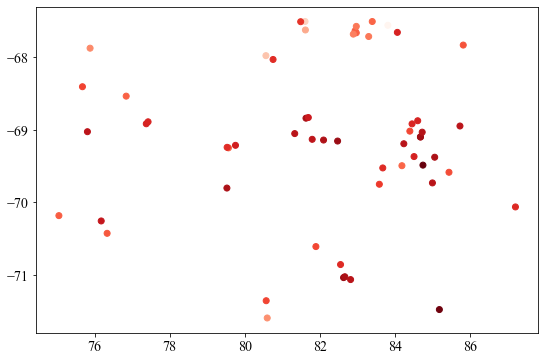

In [22]:
scatter_pts = plt.scatter(x_col, y_col, c = brightness, cmap = 'Reds')
ra_vals = scatter_pts.get_offsets()[:,0]
dec_vals = scatter_pts.get_offsets()[:,1]

In [23]:
pix_arr = pix_vals(file_flat_hdr, ra_vals, dec_vals)

In [24]:
# rearranging table into arrays for combined C/CI values

other_elem_v = [] # holds (averaged, if necessary) velocities of C/CI
other_elem_stars = [] # holds names of corresponding stars
other_elem_RA = [] # holds corresponding RA values
other_elem_DEC = [] # holds corresponding DEC values

for i in range(len(other_elem)):
    used = True # using current row of elem
    if (np.isnan(other_elem['C_I_vcen'].iloc[i]) == False) & (np.isnan(other_elem['Cl_I_vcen'].iloc[i]) == False):
        other_elem_v.append(np.mean([other_elem['C_I_vcen'].iloc[i], other_elem['Cl_I_vcen'].iloc[i]]))
    elif (np.isnan(other_elem['C_I_vcen'].iloc[i]) == False):
        other_elem_v.append(other_elem['C_I_vcen'].iloc[i])
    elif (np.isnan(other_elem['Cl_I_vcen'].iloc[i]) == False):
        other_elem_v.append(other_elem['Cl_I_vcen'].iloc[i])
    else:
        used = False
        
    if used == True: 
        other_elem_RA.append(other_elem['RA'].iloc[i])
        other_elem_DEC.append(other_elem['DEC'].iloc[i])
        other_elem_stars.append(other_elem['star'].iloc[i])

In [25]:
# replaces central velocities of H2 which have better C/Cl measurements, and deletes those which do not
FUSE_replaced = FUSE 
i = 0
while i < len(FUSE_replaced):
    if FUSE_replaced['star'].iloc[i] in other_elem_stars:
        FUSE_replaced['vcen'].iloc[i] = other_elem_v[other_elem_stars.index(FUSE_replaced['star'].iloc[i])]
        other_elem_v.pop(other_elem_stars.index(FUSE_replaced['star'].iloc[i]))
        other_elem_stars.pop(other_elem_stars.index(FUSE_replaced['star'].iloc[i]))
    else:
        FUSE_replaced = FUSE_replaced.drop(FUSE_replaced.index[i])
        i -= 1
    i += 1
        
# removing velocities of H2 that're out of range of HI
i = 0
while i < len(FUSE_replaced):
    if (v_indx(FUSE_replaced['vcen'].iloc[i] * 10 ** 3) < 0) or (v_indx(FUSE_replaced['vcen'].iloc[i] * 10 ** 3) > 300):
        FUSE_replaced = FUSE_replaced.drop(FUSE_replaced[FUSE_replaced['star'] == FUSE_replaced.iloc[i]['star']].index)
        i -= 1
    i += 1
    

/Users/FRANNYPACK/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [26]:
pix_arr2 = pix_vals(file_flat_hdr, np.array(FUSE_replaced['RA']), np.array(FUSE_replaced['DEC']))

# TOTAL COLUMN DENSITY MAPS

In [53]:
tot_col_dens = 1.82 * (10 ** 18) * np.nansum(file[0].data, axis = 0) * 0.244297870185 # in cm^-2

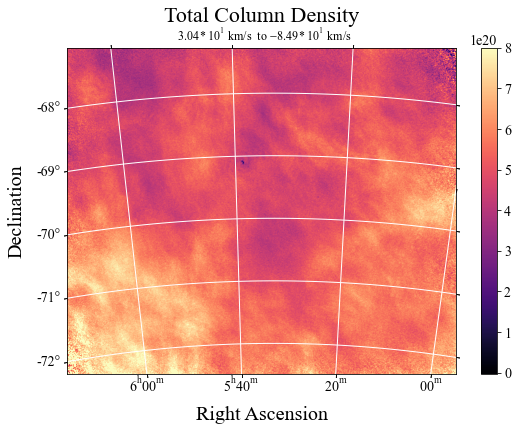

In [111]:
# column density over entire velocity range

col_dens(tot_col_dens, -0.25 * 10 ** 19,  0.8 * 10 ** 21, 'Total Column Density', '$\mathregular{3.04 * 10^{1}}$ km/s  to $\mathregular{-8.49 * 10^{1}}$ km/s')


In [54]:
col_dens1 = 1.82 * (10 ** 18) * np.sum(file[0].data[v_indx(1.06 * 10 ** 4):v_indx(-1.06 * 10 ** 4)], axis = 0) * 0.244297870185


In [55]:
col_dens2 = 1.82 * (10 ** 18) * np.sum(file[0].data[v_indx(6.97 * 10 ** 3):v_indx(-6.22 * 10 ** 3)], axis = 0) * 0.244297870185 


In [56]:
col_dens3 = 1.82 * (10 ** 18) * np.sum(file[0].data[v_indx(-1.06 * 10 ** 4):v_indx(-4.29 * 10 ** 4)], axis = 0) * 0.244297870185 


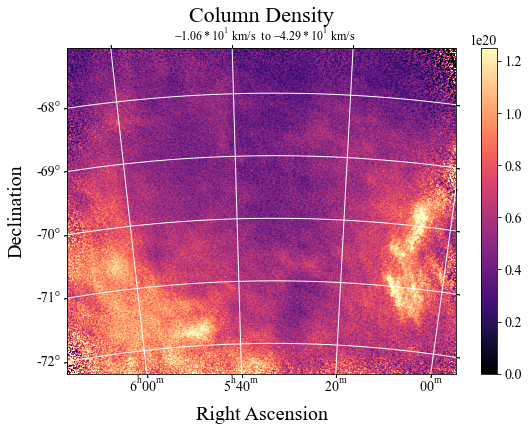

In [114]:
# over range of velocities where structure dissipates/no longer present
col_dens(col_dens3, 0, 1.25 * 10 ** 20, 'Column Density', '$\mathregular{-1.06 * 10^1}$ km/s  to $\mathregular{-4.29 * 10^1}$ km/s')



# (TOTAL) ALL H2 COLUMN DENSITY AGAINST INTEGRATED HI EMISSION

In [85]:
spearman_rank_integrated_tot = np.zeros((4, 2))

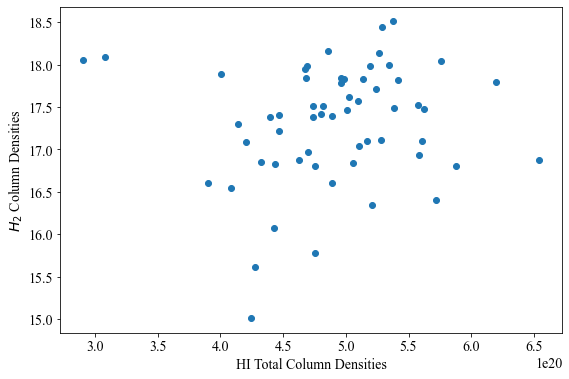

In [86]:
HI_CD_all_pix_tot, spearman_rank_integrated_tot[0,:] = HI_H2_integrated(tot_col_dens, SS = False, LS = False, log10 = False)



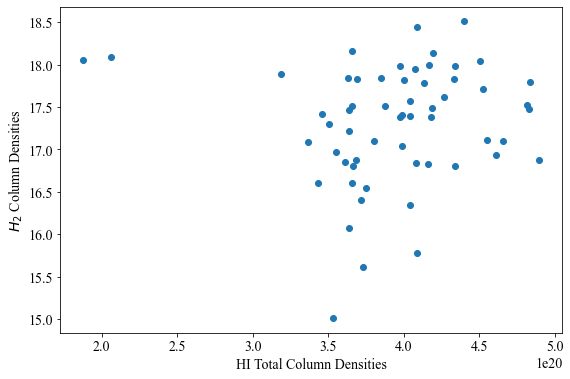

In [87]:
HI_CD_all_pix1, spearman_rank_integrated_tot[1,:] = HI_H2_integrated(col_dens1, SS = False, LS = False, log10 = False)

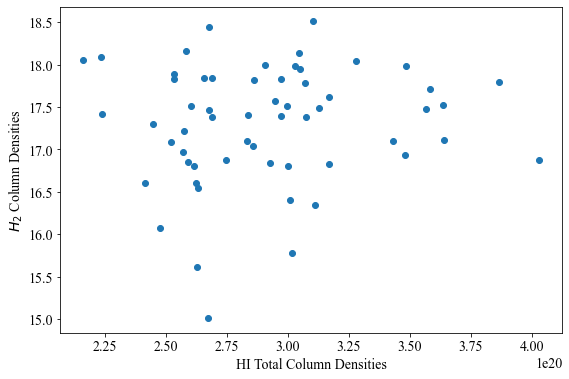

In [88]:
HI_CD_all_pix2, spearman_rank_integrated_tot[2,:] = HI_H2_integrated(col_dens2, SS = False, LS = False, log10 = False)

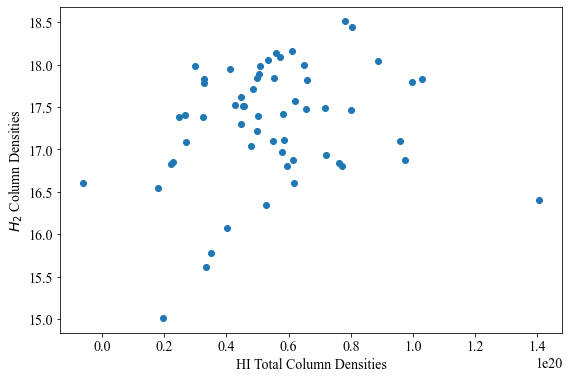

In [89]:
HI_CD_all_pix3, spearman_rank_integrated_tot[3,:] = HI_H2_integrated(col_dens3, SS = False, LS = False, log10 = False)

In [90]:
spearman_rank_integrated_tot

array([[0.18016549, 0.17594878],
       [0.15746409, 0.23780656],
       [0.08960596, 0.50355241],
       [0.22950568, 0.08309035]])

# (TOTAL) SELECT H2 COLUMN DENSITY (only where C/Cl measurements = available) AGAINST HI EMISSION @ SPECIFIC VELOCITIES

In [103]:
HI_CD_otherelem_tot = HI_H2_one(SS = False, LS = False, log10 = False)

/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_64654/3605726326.py:1: RuntimeWarning: invalid value encountered in log10
  plt.scatter(np.log10(HI_CD_otherelem_tot), FUSE_replaced['total_log10_N'], c = 'red')


(19.9, 20.3)

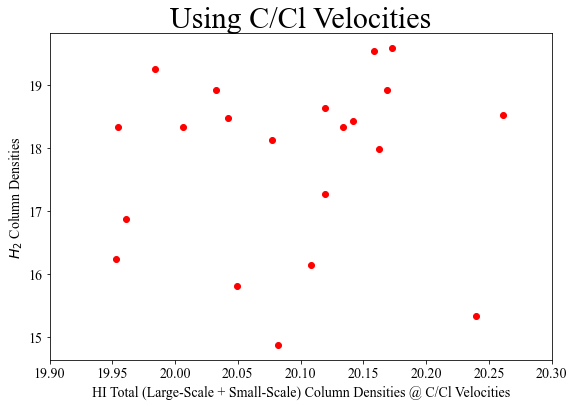

In [104]:
plt.scatter(np.log10(HI_CD_otherelem_tot), FUSE_replaced['total_log10_N'], c = 'red')
plt.xlabel('HI Total (Large-Scale + Small-Scale) Column Densities @ C/Cl Velocities')
plt.ylabel('$H_2$ Column Densities')
plt.title('Using C/Cl Velocities', fontsize = 30)
plt.xlim([19.9, 20.3])

In [132]:
# replacing outliers
HI_CD_otherelem_tot = np.delete(HI_CD_otherelem_tot, 17)
FUSE_replaced_no_out_tot = FUSE_replaced.drop(137)

In [133]:
# gets spearman rank coefficient the velocity-centered plot above 
spearman_rank_one_tot = stats.spearmanr(HI_CD_otherelem_tot, FUSE_replaced_no_out_tot['total_log10_N'], nan_policy = 'omit')
print(spearman_rank_one_tot)

SpearmanrResult(correlation=-0.1034782608695652, pvalue=0.6303950708493536)


# (SS) COLUMN DENSITY MAPS

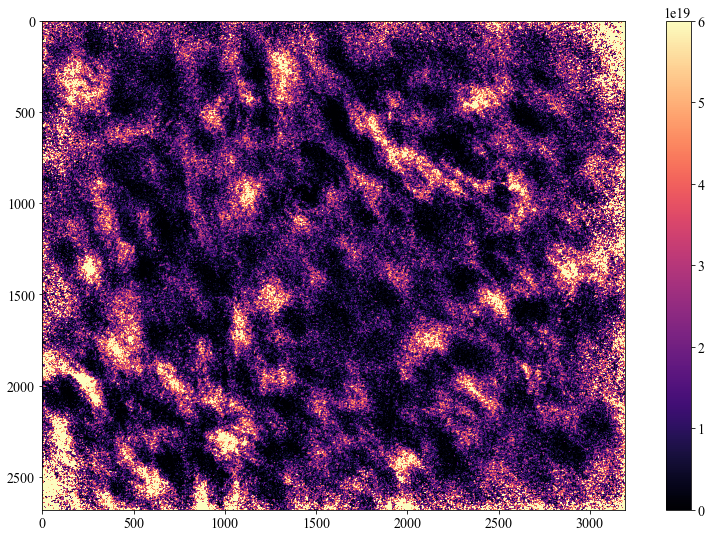

In [45]:
show_usm(tot_col_dens_SS,  vmax = 0.6 * 10 ** 20)

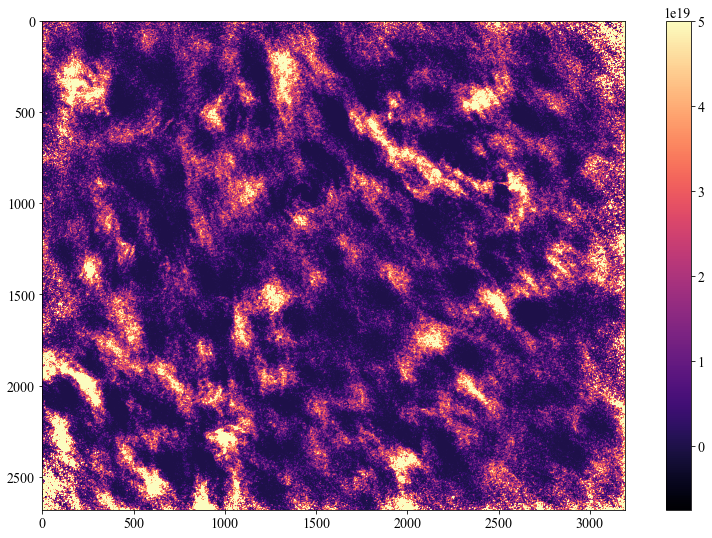

In [46]:
show_usm(col_dens1_SS, vmin = -0.75 * 10 ** 19, vmax = 0.5 * 10 ** 20)

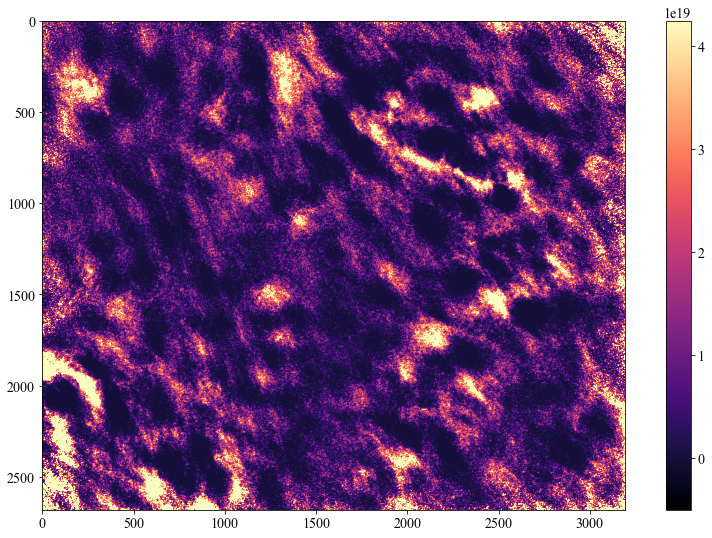

In [47]:
show_usm(col_dens2_SS, vmin = -0.5 * 10 ** 19, vmax = 4.25 * 10 ** 19)

# (SS) ALL H2 COLUMN DENSITY AGAINST INTEGRATED HI EMISSION

In [31]:
spearman_rank_integrated_SS = np.zeros((4, 2))

In [32]:
tot_col_dens_SS = usm_cd(0, 300)

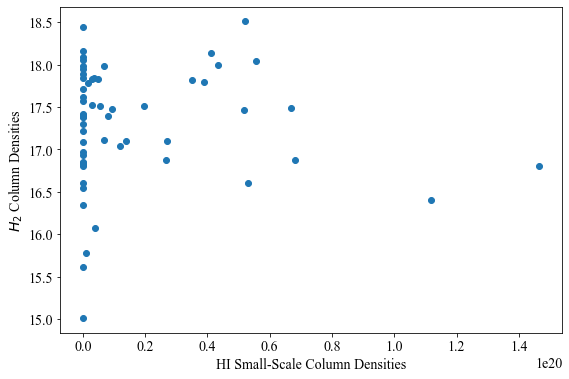

In [94]:
HI_CD_SS_pix_tot, spearman_rank_integrated_SS[0,:] = HI_H2_integrated(tot_col_dens_SS, log10 = False)

In [141]:
np.save('/Users/FRANNYPACK/Downloads/grind!/research/Data/HI_SS_arr.npy', HI_CD_SS_pix_tot)

In [34]:
col_dens1_SS = usm_cd(81, 167)

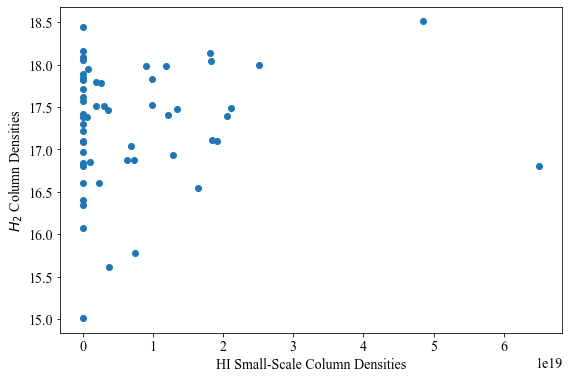

In [95]:
HI_CD_SS_pix1, spearman_rank_integrated_SS[1,:] = HI_H2_integrated(col_dens1_SS, log10 = False)

In [36]:
col_dens2_SS = usm_cd(95, 149)

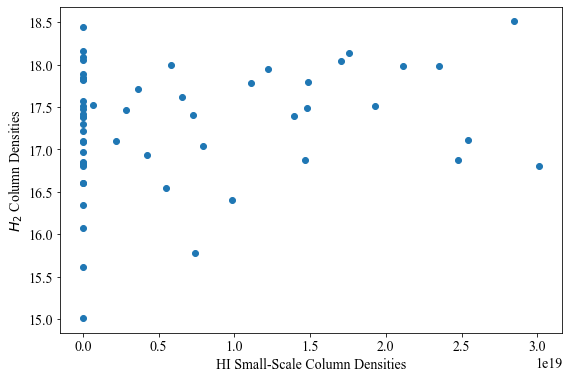

In [96]:
HI_CD_SS_pix2, spearman_rank_integrated_SS[2,:] = HI_H2_integrated(col_dens2_SS, log10 = False)

In [38]:
col_dens3_SS = usm_cd(167, 300)

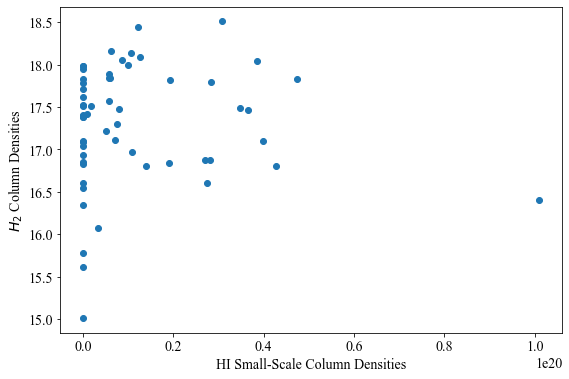

In [97]:
HI_CD_SS_pix3, spearman_rank_integrated_SS[3,:] = HI_H2_integrated(col_dens3_SS, log10 = False)

In [40]:
spearman_rank_integrated_SS

array([[0.06060243, 0.65133881],
       [0.07399234, 0.58094862],
       [0.15327595, 0.25067679],
       [0.16737267, 0.20918676]])

None of these are statistically significant AND all have little correlation

# (SS) SELECT H2 COLUMN DENSITY (only where C/Cl measurements = available) AGAINST HI EMISSION @ SPECIFIC VELOCITIES

In [49]:
HI_CD_otherelem_SS = HI_H2_one(log10 = False)

/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_64654/107195885.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(HI_CD_otherelem_SS), FUSE_replaced['total_log10_N'], c = 'red')


Text(0.5, 1.0, 'Using C/Cl Velocities')

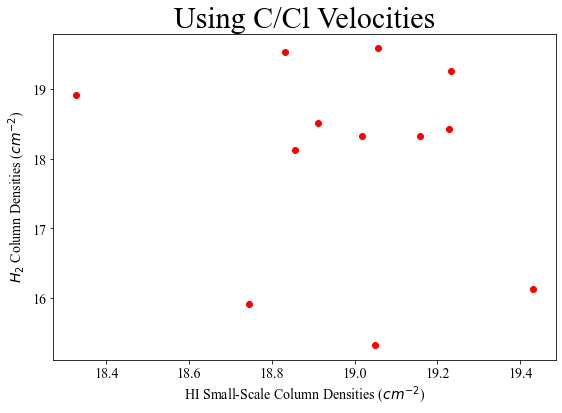

In [98]:
plt.scatter(np.log10(HI_CD_otherelem_SS), FUSE_replaced['total_log10_N'], c = 'red')
plt.xlabel('HI Small-Scale Column Densities ($cm^{-2}$)')
plt.ylabel('$H_2$ Column Densities ($cm^{-2}$)')
plt.title('Using C/Cl Velocities', fontsize = 30)
#plt.savefig('/Users/FRANNYPACK/Downloads/grind!/research/Images/LMC_HI_H2.jpg')

In [51]:
# gets spearman rank coefficient the velocity-centered plot above 
spearman_rank_one_SS = stats.spearmanr(HI_CD_otherelem_SS, FUSE_replaced['total_log10_N'], nan_policy = 'omit')
print(spearman_rank_one_SS)

SpearmanrResult(correlation=0.15760174545117922, pvalue=0.45181860148758524)


Little correlation, not statistically significant

# (LS) COLUMN DENSITY MAPS

In [57]:
tot_col_dens_LS = tot_col_dens - tot_col_dens_SS

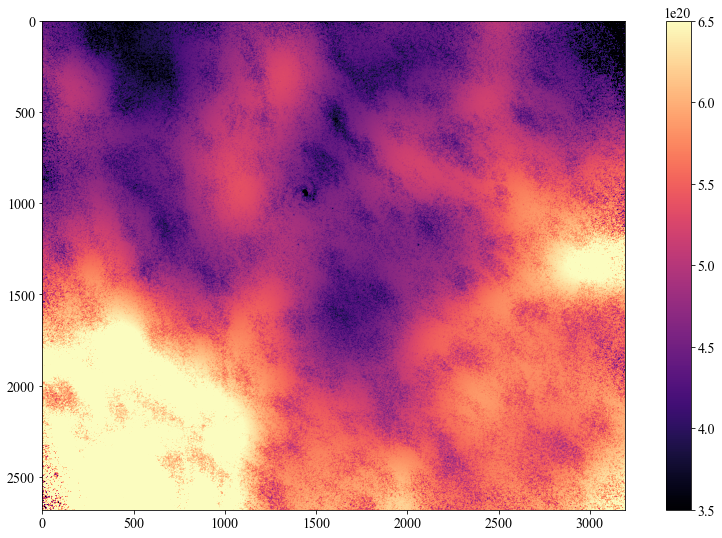

In [58]:
show_usm(tot_col_dens_LS, vmin = 3.5 * 10 ** 20, vmax = 6.5 * 10 ** 20)

In [59]:
col_dens1_LS = col_dens1 - col_dens1_SS

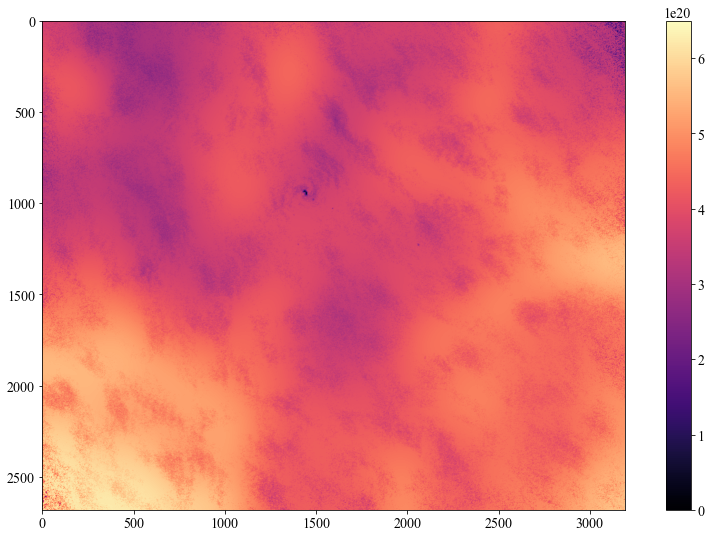

In [60]:
show_usm(col_dens1_LS, vmax = 6.5 * 10 ** 20)

In [61]:
col_dens2_LS = col_dens2 - col_dens2_SS

In [62]:
col_dens3_LS = col_dens3 - col_dens3_SS

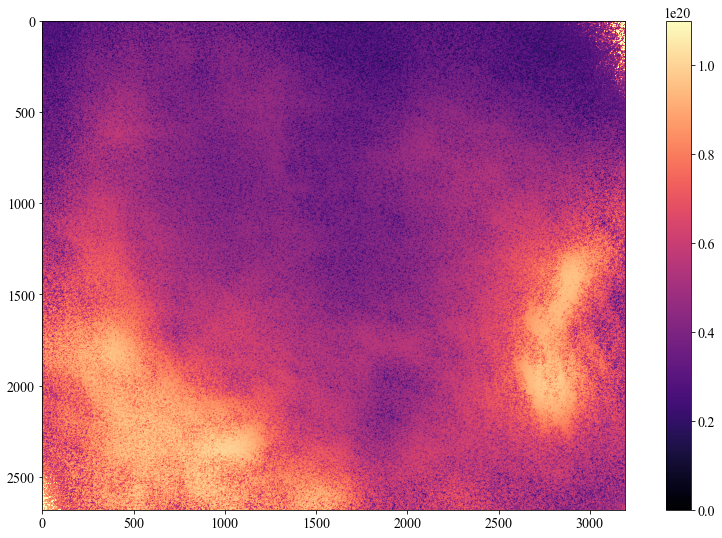

In [63]:
show_usm(col_dens3_LS, 1.1 * 10 ** 20)

# (LS) ALL H2 COLUMN DENSITY AGAINST INTEGRATED HI EMISSION


In [64]:
spearman_rank_integrated_LS = np.zeros((4, 2))

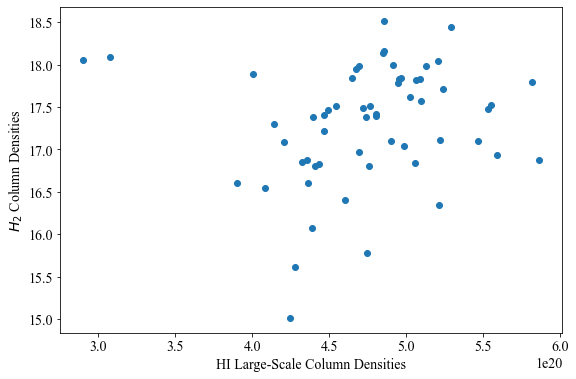

In [72]:
HI_CD_LS_pix_tot, spearman_rank_integrated_LS[0,:] = HI_H2_integrated(tot_col_dens_LS, SS = False, log10 = False)

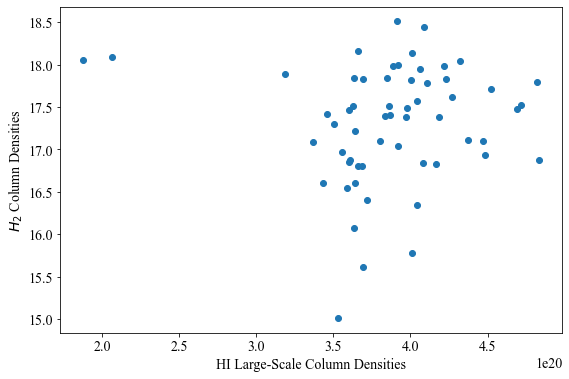

In [66]:
HI_CD_LS_pix1, spearman_rank_integrated_LS[1,:] = HI_H2_integrated(col_dens1_LS, SS = False, log10 = False)


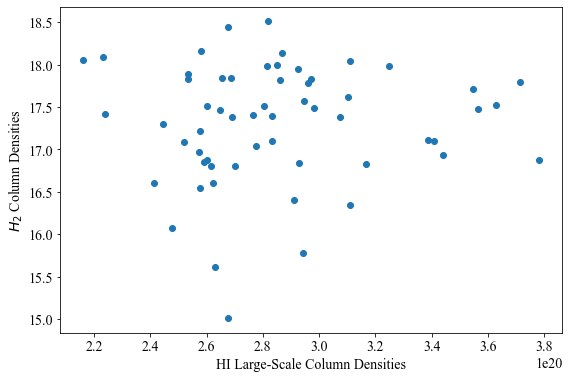

In [67]:
HI_CD_LS_pix2, spearman_rank_integrated_LS[2,:] = HI_H2_integrated(col_dens2_LS, SS = False, log10 = False)


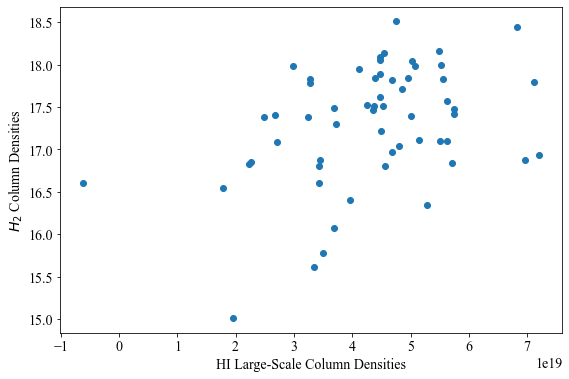

In [68]:
HI_CD_LS_pix3, spearman_rank_integrated_LS[3,:] = HI_H2_integrated(col_dens3_LS, SS = False, log10 = False)

In [69]:
spearman_rank_integrated_LS

array([[0.27453936, 0.03701734],
       [0.16460057, 0.21693683],
       [0.06536651, 0.6259029 ],
       [0.3326771 , 0.01072385]])

Okay, these seem to have some statistically significant values . . . (and upwards correlation)

# (LS) SELECT H2 COLUMN DENSITY (only where C/Cl measurements = available) AGAINST HI EMISSION @ SPECIFIC VELOCITIES

In [73]:
HI_CD_otherelem_LS = HI_H2_one(SS = False, LS = True, log10 = False)

/var/folders/xk/1lmd1p057bnc571tp2ws6_sc0000gp/T/ipykernel_64654/3353686933.py:1: RuntimeWarning: invalid value encountered in log10
  plt.scatter(np.log10(HI_CD_otherelem_LS), FUSE_replaced_no_outliers['total_log10_N'], c = 'red')


Text(0.5, 1.0, 'Using C/Cl Velocities')

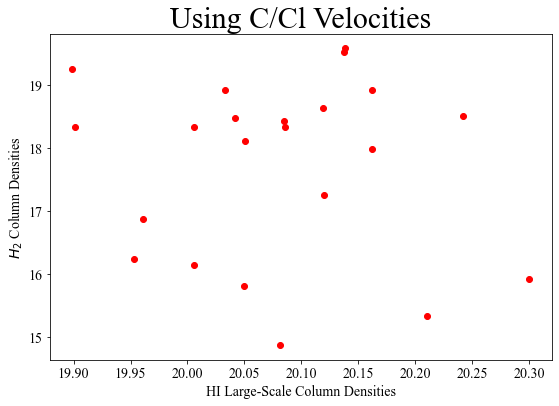

In [81]:
plt.scatter(np.log10(HI_CD_otherelem_LS), FUSE_replaced_no_outliers['total_log10_N'], c = 'red')
plt.xlabel('HI Large-Scale Column Densities')
plt.ylabel('$H_2$ Column Densities')
plt.title('Using C/Cl Velocities', fontsize = 30)

In [80]:
# removing outliers
HI_CD_otherelem_LS = np.delete(HI_CD_otherelem_LS, 17) 
FUSE_replaced_no_outliers = FUSE_replaced.drop(137)

In [82]:
# gets spearman rank coefficient the velocity-centered plot above 
spearman_rank_one_LS = stats.spearmanr(HI_CD_otherelem_LS, FUSE_replaced_no_outliers['total_log10_N'], nan_policy = 'omit')
print(spearman_rank_one_LS)

SpearmanrResult(correlation=-0.1469565217391304, pvalue=0.4931931221106659)


Little statistical significance and correlation . . .

# CALCULATING FRACTION OF SMALL-SCALE/LARGE-SCALE IN TOTAL COLUMN DENSITY

Using non-log-10 values (but only those > 0 for SS, since some are < 0)

For integrated values

In [99]:
SS_frac_tot = np.nansum(HI_CD_SS_pix_tot[np.where(HI_CD_SS_pix_tot > 0)]) / np.nansum(HI_CD_all_pix_tot[np.where(HI_CD_SS_pix_tot > 0)])
SS_frac_tot

0.06046726285863089

In [100]:
LS_frac_tot = np.nansum(HI_CD_LS_pix_tot[np.where(HI_CD_SS_pix_tot > 0)]) / np.nansum(HI_CD_all_pix_tot[np.where(HI_CD_SS_pix_tot > 0)])
LS_frac_tot


0.9395327371413691

For values using C/Cl velocities

In [106]:
SS_frac_otherelem = np.nansum(HI_CD_otherelem_SS[np.where(HI_CD_otherelem_SS > 0)]) / np.nansum(HI_CD_otherelem_tot[np.where(HI_CD_otherelem_SS > 0)])
SS_frac_otherelem


0.08078319915145071

In [112]:
LS_frac_otherelem = np.nansum(HI_CD_otherelem_LS) / np.nansum(HI_CD_otherelem_tot)
LS_frac_otherelem


0.9515081894202175

Checking robustness of calculation using other integrated values

In [113]:
SS_frac1 = np.nansum(HI_CD_SS_pix1[np.where(HI_CD_SS_pix1 > 0)]) / np.nansum(HI_CD_all_pix1[np.where(HI_CD_SS_pix1 > 0)])
SS_frac1


0.03077747335583627

In [114]:
LS_frac1 = np.nansum(HI_CD_LS_pix1[np.where(HI_CD_SS_pix1 > 0)]) / np.nansum(HI_CD_all_pix1[np.where(HI_CD_SS_pix1 > 0)])
LS_frac1


0.9692225266441638

In [115]:
SS_frac2 = np.nansum(HI_CD_SS_pix2[np.where(HI_CD_SS_pix2 > 0)]) / np.nansum(HI_CD_all_pix2[np.where(HI_CD_SS_pix2 > 0)])
SS_frac2


0.041145098228738165

In [116]:
LS_frac2 = np.nansum(HI_CD_LS_pix2[np.where(HI_CD_SS_pix2 > 0)]) / np.nansum(HI_CD_all_pix2[np.where(HI_CD_SS_pix2 > 0)])
LS_frac2


0.9588549017712619

In [117]:
SS_frac3 = np.nansum(HI_CD_SS_pix3[np.where(HI_CD_SS_pix3 > 0)]) / np.nansum(HI_CD_all_pix3[np.where(HI_CD_SS_pix3 > 0)])
SS_frac3


0.29214807700373824

In [118]:
LS_frac3 = np.nansum(HI_CD_LS_pix3[np.where(HI_CD_SS_pix3 > 0)]) / np.nansum(HI_CD_all_pix3[np.where(HI_CD_SS_pix3 > 0)])
LS_frac3


0.7078519229962618

For entire column density arrays

In [119]:
np.nansum(tot_col_dens_SS[np.where(tot_col_dens_SS > 0)]) / np.nansum(tot_col_dens[np.where(tot_col_dens_SS > 0)])

0.060112614425417175

In [120]:
np.nansum(tot_col_dens_LS[np.where(tot_col_dens_SS > 0)]) / np.nansum(tot_col_dens[np.where(tot_col_dens_SS > 0)])

0.9398878689506719

In [121]:
np.nansum(col_dens1_SS[np.where(col_dens1_SS > 0)]) / np.nansum(col_dens1[np.where(col_dens1_SS > 0)])

0.050669101134867126

In [122]:
np.nansum(col_dens1_LS[np.where(col_dens1_SS > 0)]) / np.nansum(col_dens1[np.where(col_dens1_SS > 0)])

0.9493305895612097

In [123]:
np.nansum(col_dens2_SS[np.where(col_dens2_SS > 0)]) / np.nansum(col_dens2[np.where(col_dens2_SS > 0)])

0.05571184744667319

In [124]:
np.nansum(col_dens2_LS[np.where(col_dens2_SS > 0)]) / np.nansum(col_dens2[np.where(col_dens2_SS > 0)])

0.944288532237757

In [125]:
np.nansum(col_dens3_SS[np.where(col_dens3_SS > 0)]) / np.nansum(col_dens3[np.where(col_dens3_SS > 0)])

0.2241621779674986

In [126]:
np.nansum(col_dens3_LS[np.where(col_dens3_SS > 0)]) / np.nansum(col_dens3[np.where(col_dens3_SS > 0)])

0.7758381838967191

# ALL COLUMN DENSITY PLOTS TOGETHER

In [128]:
def all_cd(tot_arr, SS_arr, LS_arr, v_begin, v_end, tot_v_min, tot_v_max, LS_v_max, SS_v_min, SS_v_max):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 8), constrained_layout = True)
    fig.suptitle('From ' + str(v_begin) + ' km/s to ' + str(v_end) + ' km/s', y = 0.8, fontsize = 40)
    wcs = WCS(file[0].header)

    ax1.plot(projection = wcs, slices = ['x','y',1], zorder = -1)
    tot = ax1.imshow(np.flip(tot_arr, axis = 0), cmap = 'magma', vmin = tot_v_min, vmax = tot_v_max)
    ax1.set_title('Total Column Density', fontsize = 30)
    cbar1 = fig.colorbar(tot, ax = ax1, orientation = 'horizontal', pad = 0.1)
    #cbar1.ax.set_xticklabels(cbar1.ax.get_xticklabels(), fontsize = 30)
    
    ax2.plot(projection = wcs, slices = ['x','y',1], zorder = -1)
    LS = ax2.imshow(np.flip(LS_arr, axis = 0), cmap = 'magma', vmin = 0, vmax = LS_v_max)
    ax2.set_title('Large-Scale Column Density', fontsize = 30)
    fig.colorbar(LS, ax = ax2, orientation = 'horizontal', pad = 0.1)
    
    ax3.plot(projection = wcs, slices = ['x','y',1], zorder = -1)
    SS = ax3.imshow(np.flip(SS_arr, axis = 0), cmap = 'magma', vmin = SS_v_min, vmax = SS_v_max)
    ax3.set_title('Small-Scale Column Density', fontsize = 30)
    cbar = fig.colorbar(SS, ax = ax3, orientation = 'horizontal', pad = 0.1)

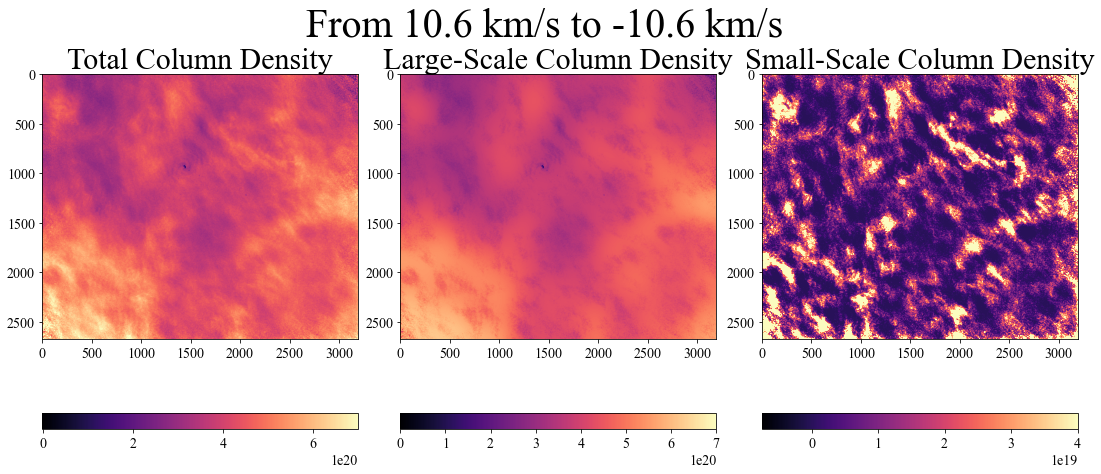

In [129]:
all_cd(col_dens1, col_dens1_SS, col_dens1_LS, 10.6, -10.6, -0.25 * 10 ** 19,  0.7 * 10 ** 21, 7 * 10 ** 20, -0.75 * 10 ** 19, 0.4 * 10 ** 20)

